In [1]:
!pip install LXML

# I. Sentiment Analysis

In [2]:
import os
import gzip
import json

import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
%matplotlib inline

In [3]:
cwd = os.getcwd()
datadir = '/'.join(cwd.split('/')[0:-1]) + '/data/'

In [86]:
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF(datadir+'reviews_Cell_Phones_and_Accessories_5.json.gz')

In [107]:
df.shape

(194439, 13)

In [167]:
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulscore,helpfulbinary,helpfultotalresponse,helpfulbin
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4.0,Looks Good,1400630400,"05 21, 2014",-1.000000,NoData,0,NoData
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5.0,Really great product.,1389657600,"01 14, 2014",-1.000000,NoData,0,NoData
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5.0,LOVE LOVE LOVE,1403740800,"06 26, 2014",-1.000000,NoData,0,NoData
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4.0,Cute!,1382313600,"10 21, 2013",1.000000,>=60%,4,>=60%
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5.0,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",0.666667,>=60%,3,>=60%
5,APX47D16JOP7H,120401325X,RLH,"[1, 2]",These make using the home button easy. My daug...,3.0,Cute,1381536000,"10 12, 2013",0.500000,<60%,2,<60%
6,A1JVVYYO7G56DS,120401325X,Tyler Evans,"[0, 0]",Came just as described.. It doesn't come unstu...,5.0,best thing ever..,1377129600,"08 22, 2013",-1.000000,NoData,0,NoData
7,A6FGO4TBZ3QFZ,3998899561,Abdullah Albyati,"[1, 2]",it worked for the first week then it only char...,1.0,not a good Idea,1384992000,"11 21, 2013",0.500000,<60%,2,<60%
8,A2JWEDW5FSVB0F,3998899561,Adam,"[2, 3]","Good case, solid build. Protects phone all aro...",5.0,Solid Case,1380067200,"09 25, 2013",0.666667,>=60%,3,>=60%
9,A8AJS1DW7L3JJ,3998899561,Agata Majchrzak,"[1, 1]",This is a fantastic case. Very stylish and pro...,5.0,Perfect Case,1396483200,"04 3, 2014",1.000000,>=60%,1,>=60%


In [89]:
def convert_timestamp(tstamp):
    return datetime.datetime.fromtimestamp(int(tstamp)).strftime('%m/%d/%Y - %H:%M:%S')

def rating_stats(table):
    print ("Number of Ratings: {}".format(table["overall"].count()))
    print ("Average Rating: {:0.2f}".format(table["overall"].mean()))
    print ("Date of First Rating: {}".format(convert_timestamp(table["unixReviewTime"].min()).split()[0]))
    print ("Date of Latest Rating: {}".format(convert_timestamp(table["unixReviewTime"].max()).split()[0]))

rating_stats(df)
df.head()

Number of Ratings: 194439
Average Rating: 4.13
Date of First Rating: 02/21/2001
Date of Latest Rating: 07/22/2014


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4.0,Looks Good,1400630400,"05 21, 2014"
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5.0,Really great product.,1389657600,"01 14, 2014"
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5.0,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4.0,Cute!,1382313600,"10 21, 2013"
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5.0,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [96]:
df['helpfulscore'] = df['helpful'].map(lambda x: x[0]/x[1] if x[1]!=0 else -1)
df['helpfulbin'] = pd.cut(df['helpfulscore'], bins = [-1, 0, 0.6, 1.0], labels = ['NoData', '<60%', '>=60%'], include_lowest = True)
df['helpfultotalresponse'] = df['helpful'].map(lambda x: x[1])

In [242]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,helpfulscore,helpfulbinary,helpfultotalresponse,helpfulbin
0,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4.0,Looks Good,1400630400,"05 21, 2014",-1.000000,NoData,0,NoData
1,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5.0,Really great product.,1389657600,"01 14, 2014",-1.000000,NoData,0,NoData
2,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5.0,LOVE LOVE LOVE,1403740800,"06 26, 2014",-1.000000,NoData,0,NoData
3,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4.0,Cute!,1382313600,"10 21, 2013",1.000000,>=60%,4,>=60%
4,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5.0,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013",0.666667,>=60%,3,>=60%


In [98]:
df['helpfultotalresponse'].describe()

count    194439.000000
mean          1.737043
std          16.800879
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        2031.000000
Name: helpfultotalresponse, dtype: float64

In [123]:
plt.rcParams.update({'font.size': 22})

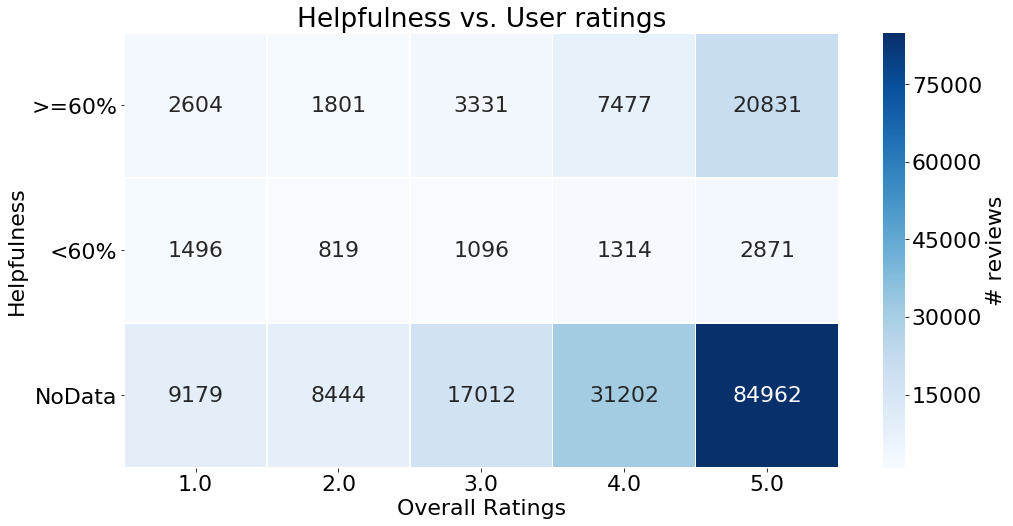

In [179]:
df_s = df.groupby(['overall', 'helpfulbin']).agg({'reviewerID': 'count'})
df_s = df_s.unstack()
df_s.columns = df_s.columns.get_level_values(1)
fig = plt.figure(figsize=(16,8))

sns.heatmap(df_s[df_s.columns[::-1]].T, cmap = 'Blues', linewidths=.5, annot = True, fmt = 'd', cbar_kws={'label': '# reviews'})
plt.yticks(rotation=0)
plt.ylabel('Helpfulness')
plt.xlabel('Overall Ratings')
plt.title('Helpfulness vs. User ratings');

### Overall Score Prediction
*adding titles in the text body increased accuracy

In [108]:
X = df['summary'].map(str) +' '+ df['reviewText']
y_dict = {1:0, 2:0, 3:0, 4:1, 5:1}
y = df['overall'].map(y_dict)

#### 1. Logistic regression model on word count

In [109]:
c = CountVectorizer(stop_words = 'english')

def text_fit(X, y, model, clf_model, coef_show=1):
    
    X_c = model.fit_transform(X)
    print('# features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y, random_state=0)
    print('# train records: {}'.format(X_train.shape[0]))
    print('# test records: {}'.format(X_test.shape[0]))
    clf = clf_model.fit(X_train, y_train)
    acc = clf.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = model.get_feature_names()
        coef = clf.coef_.tolist()[0]
        coeff_df = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_df = coeff_df.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('')
        print('    -Top 20 positive-    ')
        print(coeff_df.head(20))
        print('')
        print('    -Top 20 negative-    ')        
        print(coeff_df.tail(20))
    
    
text_fit(X, y, c, LogisticRegression())

# features: 88892
# train records: 145829
# test records: 48610


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model Accuracy: 0.8766920386751698

    -Top 20 positive-    
                 Word  Coefficient
58864      phenomenal     1.679716
21375     complements     1.596336
31098        excelent     1.590804
76128          superb     1.537806
68601           saved     1.521353
28513              dx     1.495294
39138        hesitate     1.478967
31115       excellent     1.456355
48140           loves     1.427801
11840         awesome     1.401374
39284          highly     1.382412
48132          lovely     1.379813
40269            hugs     1.330975
82389  understandable     1.317906
9052           amazed     1.308126
8071           affect     1.299184
21432     compliments     1.287425
10172       apologize     1.281966
39417           hitch     1.264213
74710           steal     1.250097

    -Top 20 negative-    
                Word  Coefficient
24997        defeats    -1.544807
55253           okay    -1.545390
39863       horrible    -1.556523
29371           ehhh    -1.557796
60498 

#### 2. Dummy (predicting with majority class)

In [13]:
text_fit(X, y, c, DummyClassifier(),0)

# features: 88892
# train records: 145829
# test records: 48610
Model Accuracy: 0.6423986833984777


#### 3. Logistic regression model on TFIDF

In [110]:
tfidf = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidf, LogisticRegression())

# features: 88892
# train records: 145829
# test records: 48610


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.8823081670438181

    -Top 20 positive-    
            Word  Coefficient
36975      great    10.315762
48098       love     9.350137
31115  excellent     8.729055
58442    perfect     8.123926
11840    awesome     7.718451
39284     highly     7.308045
58475  perfectly     6.607532
13951       best     6.142629
48140      loves     5.586953
9060     amazing     5.469233
32222  fantastic     4.544669
87578      worry     4.476759
87487      works     4.424650
59911    pleased     4.377921
68601      saved     4.266067
28949       easy     4.255549
72851      solid     4.165036
32244        far     4.124039
50721      minor     4.022074
36018       glad     3.961427

    -Top 20 negative-    
                Word  Coefficient
65488         refund    -4.527489
15901          broke    -4.549456
44918           junk    -4.716620
21593        concept    -4.791065
82557  unfortunately    -5.102203
49893            meh    -5.123379
66776      returning    -5.339113
75062    

#### 4. Logistic regression model on TFIDF + ngram

In [111]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X, y, tfidf_n, LogisticRegression())

# features: 2542025
# train records: 145829
# test records: 48610


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.883254474387986

    -Top 20 positive-    
                     Word  Coefficient
977781              great    16.653475
1329722              love    15.593216
1602275           perfect    12.506382
784694          excellent    11.484108
201179            awesome    10.686444
248753               best     9.317770
1605393         perfectly     8.863746
2511457             works     7.674665
1334747             loves     7.551863
131515            amazing     7.131898
736447               easy     6.949640
1053106            highly     6.814405
1476084              nice     6.702627
1661141           pleased     5.819547
826844                far     5.686915
981411      great product     5.493324
1053372  highly recommend     5.409538
870320               fits     5.401779
2086102             solid     5.261512
825820          fantastic     5.052388

    -Top 20 negative-    
                  Word  Coefficient
2136156        started    -5.657968
2155969        stoppe

# II. Helpfulness Analysis

*try this on score 1,2,3,4,5

In [165]:
df_helpful = df[df['overall'] == 5]
df_helpful = df_helpful[df_helpful['helpfulbin'].isin(['<60%', '>=60%'])]
df_helpful.shape

X_help = df_helpful['summary'].map(str) +' '+ df_helpful['reviewText']
y_dict = {'<60%': 0, '>=60%': 1}
y_help = df_helpful['helpfulbin'].map(y_dict)

print('Class distribution:')
print(y.value_counts())

Class distribution:
1    20831
0     2871
Name: helpfulbin, dtype: int64


In [200]:
df_helpful['lengthofreview'] = df_helpful['reviewText'].str.split().apply(len)

In [240]:
df_2 = df_helpful.groupby(pd.cut(df_helpful['lengthofreview'], 
                                 bins = 1000)).agg({'helpfulscore':'mean'},{'asin':'count'}).rename(columns={'helpfulscore':'MeanHelpful'})

In [166]:
tfidf_n = TfidfVectorizer(ngram_range=(1,2),stop_words = 'english')
text_fit(X_help, y_help, tfidf_n, LogisticRegression())

# features: 839396
# train records: 17776
# test records: 5926


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Model Accuracy: 0.8796827539655754

    -Top 20 positive-    
               Word  Coefficient
719439       stylus     1.686850
350150         hold     1.205685
411823      leather     1.136948
313285        glare     1.104790
383182         ipad     1.055999
683564        small     1.033175
125181         card     0.976269
564645        power     0.943176
57853          apps     0.927805
755529          tip     0.918967
261422    excellent     0.905755
759935        touch     0.896422
260027          evo     0.891111
564198        pouch     0.890590
128971  case bought     0.873628
229095        doesn     0.868684
731668          tab     0.863071
448989        makes     0.838102
53586           app     0.827717
101727        brand     0.817627

    -Top 20 negative-    
                 Word  Coefficient
109596          bulky    -0.908265
743213          thank    -0.914051
685197          smart    -0.915359
195045       customer    -0.927557
682037       slippery    -0.936582
69449   

Text(0.5,1,'Portion of People find helpful vs. Length')

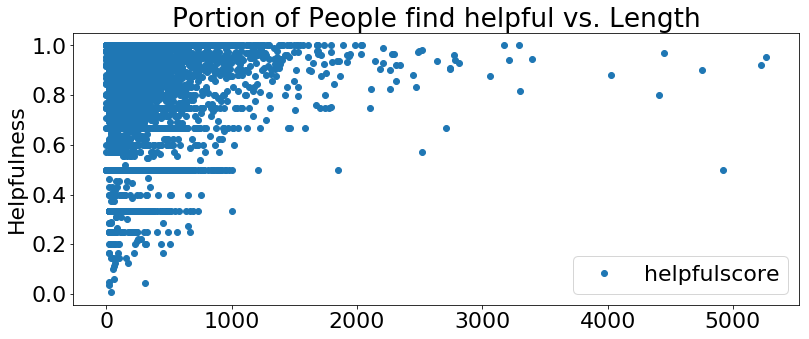

In [227]:
ax = df_helpful.plot(x='lengthofreview', y='helpfulscore', style='o',figsize=(13,5))
plt.xlabel('')
plt.ylabel('Helpfulness')
plt.title('Portion of People find helpful vs. Length')

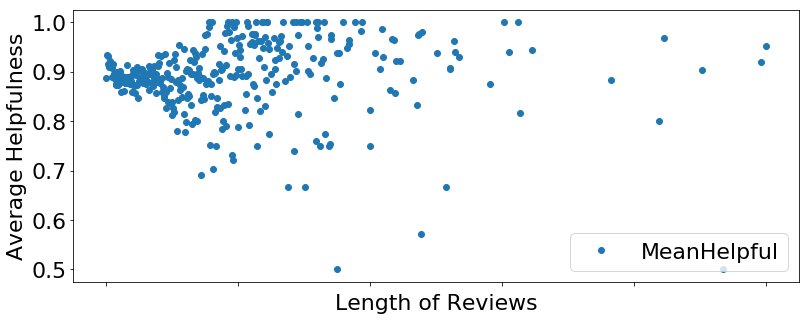

In [228]:
ax = df_2.plot(style='o',figsize=(13,5))
plt.xlabel('Length of Reviews')
plt.ylabel('Average Helpfulness')
plt.legend(loc='lower right')

Text(0.5,1,'Number of Responses vs. Length')

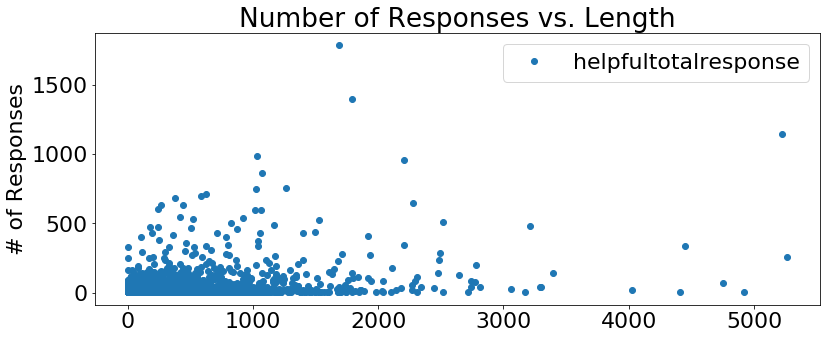

In [246]:
ax = df_helpful.plot(x='lengthofreview', y='helpfultotalresponse', style='o',figsize=(13,5))
plt.xlabel('')
plt.ylabel('# of Responses')
plt.title('Number of Responses vs. Length')

# III. Topic Modeling: Finding Reasons for Positive or Negative Reviews

In [144]:
df_topic = df[(df['overall'] == 5) & (df['helpfulbin'] == '<60%')]

In [145]:
import nltk
from nltk import FreqDist
#nltk.download('stopwords') # run this one time
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [146]:
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim

In [147]:
#Regex to get rid of characters that are non-letter
df_topic['reviewText'] = df_topic['reviewText'].str.replace("[^a-zA-Z#]", " ")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [148]:
df.shape

(194439, 13)

In [149]:
df_topic.shape

(2871, 13)

In [150]:
df_topic.describe()

,overall,unixReviewTime,helpfulscore,helpfultotalresponse
count,2871.0,2.871000e+03,2871.000000,2871.000000
mean,5.0,1.362784e+09,0.486812,3.119122
std,0.0,3.876916e+07,0.071524,5.434092
min,5.0,1.033690e+09,0.006024,2.000000
25%,5.0,1.353240e+09,0.500000,2.000000
50%,5.0,1.371427e+09,0.500000,2.000000
75%,5.0,1.387411e+09,0.500000,3.000000
max,5.0,1.405555e+09,0.600000,166.000000


In [151]:
# find most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,4))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    loc, labels = plt.xticks()
    ax.set_xticklabels(labels, rotation=45)
    plt.show()

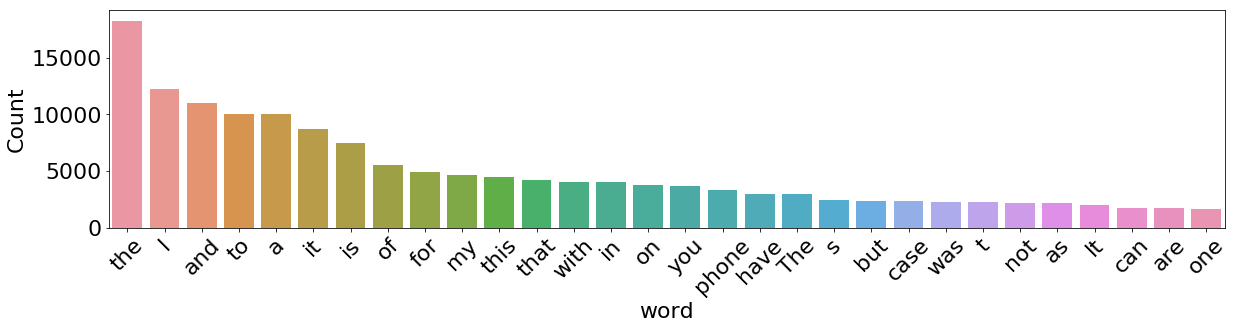

In [152]:
freq_words(df_topic['reviewText'])

#### Remove Stopwords

In [153]:
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
df_topic['reviewText'] = df_topic['reviewText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# make entire text lowercase
reviews = [r.lower() for r in df_topic['reviewText']]

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in reviews]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


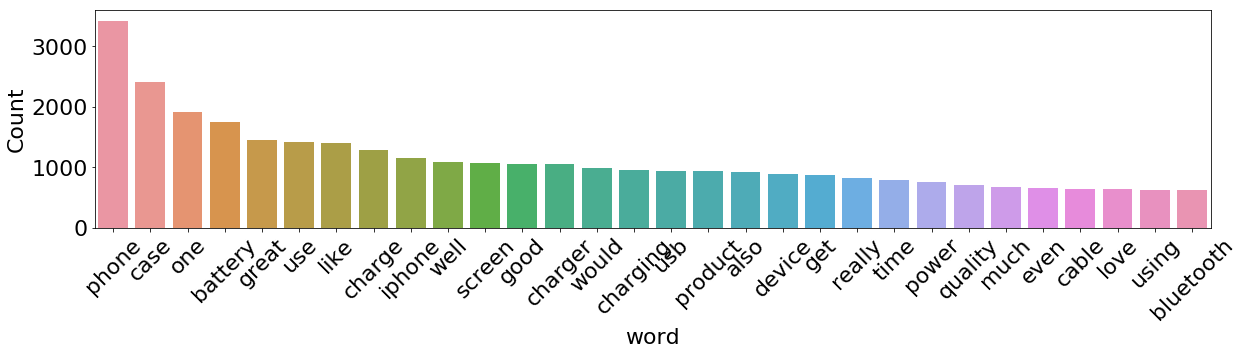

In [154]:
freq_words(reviews)

#### Lemmatization

In [37]:
#!python -m spacy download en

    100% |████████████████████████████████| 37.4MB 84kB/s ta 0:00:0121
  Running setup.py install for en-core-web-sm ... done

    Linking successful
    /anaconda3/lib/python3.6/site-packages/en_core_web_sm -->
    /anaconda3/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en')



In [155]:
nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [156]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print('Tokenized:',tokenized_reviews[1])
lemma_reviews = lemmatization(tokenized_reviews)
print('Lemmatized:',lemma_reviews[1]) # print lemmatized review

Tokenized: ['bought', 'case', 'wife', 'qualify', 'free', 'shipping', 'came', 'different', 'colors', 'match', 'phone', 'entire', 'hours', 'without', 'charging', 'kid', 'playing', 'games', 'day', 'long', 'complaints', 'problems', 'personally', 'wrote', 'another', 'review', 'wrong', 'spot', 'since', 'diff', 'phones', 'diff', 'colors']
Lemmatized: ['case', 'wife', 'free', 'shipping', 'different', 'color', 'phone', 'entire', 'hour', 'kid', 'playing', 'game', 'day', 'long', 'complaint', 'problem', 'review', 'wrong', 'spot', 'diff', 'phone', 'diff', 'color']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


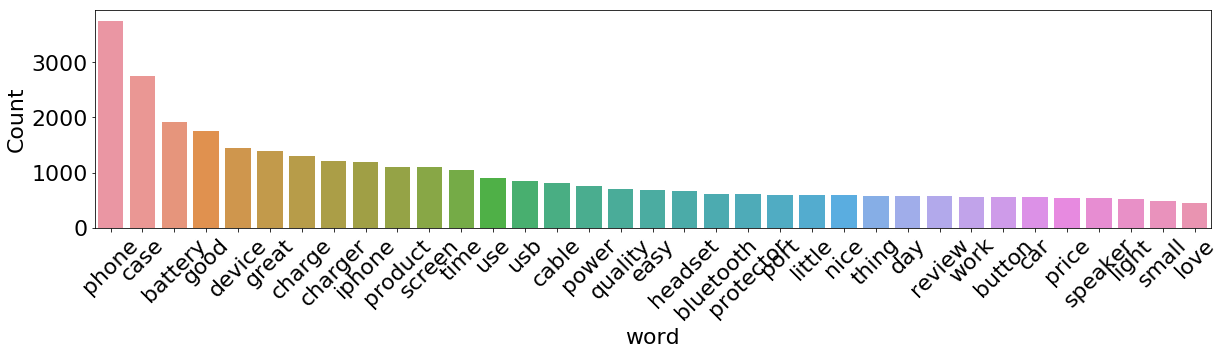

In [157]:
lemma_reviews_comb = []
for i in range(len(lemma_reviews)):
    lemma_reviews_comb.append(' '.join(lemma_reviews[i]))

df_topic['reviews'] = lemma_reviews_comb

freq_words(df_topic['reviews'], 35)

#### LDA model (Latent Dirichlet Allocation)

In [158]:
#term dictionary for our corpus
dictionary = corpora.Dictionary(lemma_reviews)

In [159]:
print(dictionary)

Dictionary(7743 unique tokens: ['back', 'battery', 'case', 'entertainment', 'fit']...)


In [160]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in lemma_reviews]

In [161]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model (7 topics)
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=5, random_state=100,
                chunksize=1000, passes=50)

In [162]:
lda_model.print_topics()

[(0,
  '0.084*"case" + 0.038*"phone" + 0.021*"screen" + 0.018*"good" + 0.015*"protector" + 0.015*"great" + 0.014*"iphone" + 0.010*"easy" + 0.009*"protection" + 0.009*"product"'),
 (1,
  '0.064*"phone" + 0.040*"battery" + 0.018*"good" + 0.015*"great" + 0.014*"day" + 0.011*"time" + 0.009*"use" + 0.008*"life" + 0.008*"iphone" + 0.008*"work"'),
 (2,
  '0.045*"screen" + 0.023*"glass" + 0.020*"protector" + 0.011*"dust" + 0.009*"armor" + 0.009*"film" + 0.007*"instruction" + 0.007*"installation" + 0.007*"tape" + 0.007*"bumper"'),
 (3,
  '0.022*"bluetooth" + 0.021*"headset" + 0.021*"speaker" + 0.016*"good" + 0.016*"sound" + 0.015*"phone" + 0.014*"ear" + 0.012*"quality" + 0.012*"music" + 0.010*"device"'),
 (4,
  '0.033*"charger" + 0.032*"charge" + 0.030*"device" + 0.025*"usb" + 0.023*"cable" + 0.021*"battery" + 0.020*"power" + 0.017*"port" + 0.016*"product" + 0.012*"iphone"')]

In [163]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.123405  0.183740       1        1  25.723509
0     -0.041237 -0.154578       2        1  24.781221
1     -0.080494 -0.077393       3        1  22.782446
3     -0.076283  0.013659       4        1  22.436623
2      0.321418  0.034573       5        1   4.276203, topic_info=     Category         Freq          Term        Total  loglift  logprob
term                                                                   
2     Default  2605.000000          case  2605.000000  30.0000  30.0000
260   Default   994.000000        screen   994.000000  29.0000  29.0000
313   Default  1113.000000       charger  1113.000000  28.0000  28.0000
9     Default  3546.000000         phone  3546.000000  27.0000  27.0000
1     Default  1855.000000       battery  1855.000000  26.0000  26.0000
121   Default  1240.000000        charge  1240.000000  25.0000  25.0000
326   Default   811.000000           usb   811.000000  24.0000  24.0000
832   Default   573.000000     protector   573.000000  23.0000  23.0000
149   Default   599.000000     bluetooth   599.000000  22.0000  22.0000
298   Default   589.000000       headset   589.000000  21.0000  21.0000
837   Default   588.000000       speaker   588.000000  20.0000  20.0000
317   Default   782.000000         cable   782.000000  19.0000  19.0000
320   Default  1383.000000        device  1383.000000  18.0000  18.0000
226   Default   583.000000          port   583.000000  17.0000  17.0000
263   Default   435.000000         sound   435.000000  16.0000  16.0000
396   Default   740.000000         power   740.000000  15.0000  15.0000
123   Default   377.000000           ear   377.000000  14.0000  14.0000
423   Default   335.000000         music   335.000000  13.0000  13.0000
854   Default   170.000000         glass   170.000000  12.0000  12.0000
770   Default   281.000000          ipad   281.000000  11.0000  11.0000
14    Default   550.000000           day   550.000000  10.0000  10.0000
1185  Default   275.000000    protection   275.000000   9.0000   9.0000
574   Default   269.000000     headphone   269.000000   8.0000   8.0000
167   Default   313.000000          life   313.000000   7.0000   7.0000
5     Default  1661.000000          good  1661.000000   6.0000   6.0000
514   Default   227.000000         micro   227.000000   5.0000   5.0000
210   Default   180.000000         voice   180.000000   4.0000   4.0000
336   Default   499.000000           car   499.000000   3.0000   3.0000
456   Default   262.000000        volume   262.000000   2.0000   2.0000
2292  Default   255.000000           mah   255.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
1480   Topic5    38.409206          tape    43.826065   3.0202  -4.9228
2004   Topic5    26.214315      commuter    30.710339   2.9938  -5.3048
2612   Topic5    29.909185    waterproof    35.234653   2.9882  -5.1730
1259   Topic5    21.479458         frame    25.869209   2.9661  -5.5040
1828   Topic5    47.011787          film    60.099335   2.9065  -4.7207
854    Topic5   123.664421         glass   170.899368   2.8286  -3.7536
444    Topic5    57.635849          dust    82.879852   2.7889  -4.5170
2598   Topic5    23.838570         proof    30.972851   2.8903  -5.3998
1978   Topic5    22.564211          lint    30.538084   2.8495  -5.4548
113    Topic5    20.270128          tool    28.097454   2.8256  -5.5620
2589   Topic5    11.721467        smudge    14.612411   2.9317  -6.1097
2184   Topic5    13.058065     ballistic    16.855171   2.8969  -6.0017
80     Topic5    16.405243         screw    22.845493   2.8210  -5.7735
760    Topic5    38.434452  installation    69.094643   2.5656  -4.9222
2842   Topic5    18.323612          gold    27.109669   2.7604  -5.6629
260    Topic5   235.280563        screen   994.277039   1.7109  -3.1104
2789   Topic5    31.204165          tech    62.9292